In [1]:
import json
import glob
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_data(data):
    '''
    helper function to get the timestamp and 3-component acceleration data. 
    '''
    # read in x, y, z data
    x = data['data']['x']
    y = data['data']['y']
    z = data['data']['z']

    # calculate the timestamp
    # get the start time
    t0 = data['header']['starttime']
    npoints = len(x)
    sampling_rate = data['header']['sampling_rate']
    
    # get the end time 
    t1 = t0 + npoints / sampling_rate
    
    # form the timestamp
    t = [t0 + tmp/sampling_rate for tmp in range(0, npoints)]
    
    # station latitude and long
    return t, x, y, z

def plot_data(t, x, y, z):
    '''
    helper function to plot the 3-component acceleration data
    '''
    plt.subplot(311)
    plt.plot(t, x)
    plt.subplot(312)
    plt.plot(t, y)
    plt.ylabel('Acceleration (g)')
    plt.subplot(313)
    plt.plot(t, z)
    plt.xlabel('Time (sec)')
    plt.show()

## Read simulated data

In [3]:
import os
cwd = os.getcwd()
print (cwd)

/accounts/grad/jorothy_gong/MyShakeAnalysis/code


In [4]:
data = json.load(open('../data/EQ/simulated/12951_M5.1_1396066202.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
#print(data['header'])
print (len(x), len(t), rate)
# plot_data(t, x, y, z)

1625 1625 25.0


## Read shake table data

In [5]:
data = json.load(open('../data/EQ/shake_table/trial142_phone2.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print (len(x), len(t), rate)
# plot_data(t, x, y, z)
# from matplotlib.pyplot import specgram
# specgram(z, NFFT=100, Fs=rate, noverlap = 50);

984 984 25.0


## Read human data

In [6]:
data = json.load(open('../data/Human/013306004148017_1418583215.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print (len(x), len(t), rate)
# plot_data(t, x, y, z)

6284 6284 25.0


## Prefiltering functions

In [7]:
def variation_rate(x):
    x = np.array(x)
    if len(x) < 2:
        raise ValueError('Data length too short.')
    rates = (x[1:] - x[:-1]) / x[:-1]
    return rates[abs(x[:-1]) > 1E-10]

In [8]:
def get_variation_rate_stats(data):
    t, x, y, z = get_data(data)
    rate = data['header']['sampling_rate']
    if rate != 25:
        raise ValueError('Default 25 Hz, data ' + str(rate) + ' Hz')
    variattion_rates = [variation_rate(dt) for dt in [x, y, z]]
    kurt_xyz = [scipy.stats.kurtosis(dt) for dt in variattion_rates]
    mean_xyz = [np.mean(dt) for dt in variattion_rates]
    var_xyz = [np.var(dt) for dt in variattion_rates]
    return mean_xyz, var_xyz, kurt_xyz

In [9]:
data = json.load(open('../data/Human/013306004148017_1418583215.json', 'r'))
get_variation_rate_stats(data)

([0.011709068897979447, 0.0033885987488140967, 4.7864227840662864e-06],
 [0.024208941709908158, 0.0068994707672810993, 9.26139205256046e-06],
 [1.8412574862715978, 1.6469555657276942, 0.8366150517809801])

In [10]:
data = json.load(open('../data/Human/013306004148017_1418583215.json', 'r'))
get_variation_rate_stats(data)

([0.011709068897979447, 0.0033885987488140967, 4.7864227840662864e-06],
 [0.024208941709908158, 0.0068994707672810993, 9.26139205256046e-06],
 [1.8412574862715978, 1.6469555657276942, 0.8366150517809801])

In [11]:
data = json.load(open('../data/EQ/simulated/12951_M5.1_1396066202.json', 'r'))
get_variation_rate_stats(data)

([-0.51018754101913555, -0.44562486662966916, 3.4122939263749714e-05],
 [480.95570379101343, 770.88167604642547, 5.2359853119427808e-05],
 [228.51143784340417, 1309.4879641031034, 0.026601107522057355])

In [12]:
data_dir = '../minidata/shake_table/'
var_test_shake = []

for f in glob.glob('../minidata/shake_table/*'):
    data = json.load(open(f, 'r'))
    var_test_shake.append(get_variation_rate_stats(data)[1][0])

In [13]:
data_dir = '../minidata/human/'
var_test_human = []

for f in glob.glob('../minidata/human/*'):
    data = json.load(open(f, 'r'))
    var_test_human.append(get_variation_rate_stats(data)[1][0])

In [14]:
var_test_shake

[951.90288821219201,
 68113.999419346044,
 2888.6191347092026,
 1810.261629803932,
 240.93071478490626,
 62.520750850886351,
 2596.2896854763253,
 185.23650477257175,
 3679.878270036254,
 15418.7896224546,
 2225.6045211411565,
 265.05683873589686,
 331.60513238047224,
 4771.5311459775112,
 491.56804392737934,
 241.42047121251807,
 1517.264635733738,
 193.76491858205969,
 231.57337996899813,
 8900.2954962696931,
 2160.9451178276754,
 894.59867766381694,
 770.30802870899674,
 12774.132236922496,
 1153.2383597840289,
 577.07463346304667,
 143303.02552837852,
 274.86755162276057,
 367.95496284642729,
 154.29148597362263,
 14282.380902712679,
 388.54550316088125,
 869.42137791567222,
 4535.4787295866927,
 3157.4597964829527,
 4520.2153280564326,
 494.74797076419384,
 7840.3346062124565,
 85820.079075366128,
 135.5617849261028,
 1142.4736013823972,
 207.21758464992979,
 100156337.15123697,
 294.70930240917392,
 491.50847586583723,
 499.28174745491447,
 15074.331082429655,
 90337.728356883657

(array([ 148.,   11.,    9.,    4.,    1.,    2.,    0.,    1.,    0.,    1.]),
 array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.,  50000.]),
 <a list of 10 Patch objects>)

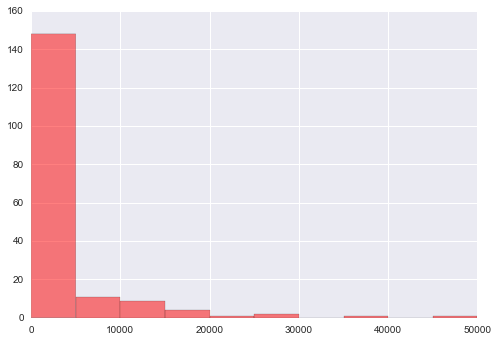

In [15]:

plt.hist([var_test_shake], color=['r'], alpha=0.5, range = (0, 50000))

In [16]:
min(var_test_shake)

45.525385598422432

In [17]:
max(var_test_shake)

100156337.15123697

In [19]:
mean(np.array(var_test_human)<10)

0.86296900489396411